# Problems

## Problem 1: Extending the Lady Tasting Tea

[The Lady Tasting Tea experiment](https://www.irishtimes.com/news/science/how-a-tea-tasting-test-led-to-a-breakthrough-in-statistics-1.3998786) was designed by statistician Ronald A. Fisher to investigate Dr Muriel Bristol's claim that she could tell whether milk or tea was poured first into a cup. Fisher set up an experiment with 8 cups of tea, 4 with milk first and 4 with tea first, arranged in random order. Bristol had to correctly identify which cups were which.
Fisher used this setup to demonstrate how to form a null hypothesis (she is guessing) and evaluate the probability of correctly identifying all cups by chance.

Here we will extend the experiment to 12 cups of tea, 4 with milk first and 8 with tea first and simulate using `numpy`, comparing the results with the original 8 cup design.


### Import Python Modules

In [740]:
# First let's import the python modules we will be using to conduct the analysis.
# https://numpy.org/doc/stable/user/index.html
import numpy as np

# https://matplotlib.org/stable/users/index
import matplotlib.pyplot as plt

# https://docs.python.org/3/library/math.html
import math

# https://docs.python.org/3/library/itertools.html
import itertools

import random

### Extended 12 Cup Experiment

Setting up the extended 12 cup experiment we can use `math.comb(n,k)` to calculate how many ways there are of selecting 4 items out of 12, where the order of the items does not matter and no item is selected more than once. The result is 495 and tells us that if randomly selecting the cups, there is a 1-in-495 chance of correctly identifying all 4 milk first cups.

In [741]:
# Number of cups
cups = 12
milk_first = 4

def combos(cups, milk_first):
    # https://docs.python.org/3/library/math.html#math.comb
    combinations = math.comb(cups, milk_first)
    print(f"Total combinations when choosing {milk_first} from {cups}: {combinations}")

combos(cups, milk_first)

Total combinations when choosing 4 from 12: 495


We can further demonstrate this by labelling the cups and using `itertools.combinations` to generate a list of all the combinations of 4 cups. We can see that the length of the list is 495.

In [742]:
def labelled_combos(cups, milk_first):
    # Label the 8 cups.
    # https://numpy.org/doc/stable/reference/generated/numpy.arange.html
    cup_labels = np.arange(cups)

    # Generate all combinations.
    # https://docs.python.org/3/library/itertools.html#itertools.combinations
    combinations = list(itertools.combinations(cup_labels, milk_first))
    return cup_labels, combinations

cup_labels, combinations = labelled_combos(cups, milk_first)

print(f"Cup labels: {cup_labels}")
print(f"Total combinations: {len(combinations)}")
print(f"First 5 combinations: {combinations[:5]}")

Cup labels: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Total combinations: 495
First 5 combinations: [(0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 2, 5), (0, 1, 2, 6), (0, 1, 2, 7)]


Let's randomly label the milk first cups. We can then count the number of times each milk first cup shows up in the 495 sets of possible combinations using `.intersection`.

In [743]:
def matches(cups, milk_first):
    cup_labels, combinations = labelled_combos(cups, milk_first)
    # Label the milk first cups.
    # https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html#numpy-random-rand
    milk_first_labels = np.random.choice(cup_labels, milk_first, replace=False)

    total_matches = []
    cups_chosen = []
    number = []
    loop = 0
    # Loop through all combinations.
    for comb in combinations:
        # Return the common elements between sets.
        # https://docs.python.org/3/library/stdtypes.html#frozenset.intersection
        match = set(comb).intersection(set(milk_first_labels))
        # Add the count of common elements to a list.
        total_matches.append(len(match))
        # Print first 5 sets.
        loop += 1
        if loop < 6:
            cups_chosen.append(comb)
            number.append(len(match))
    
    return milk_first_labels, cups_chosen, number, total_matches


x = matches(cups, milk_first)
print(f"Milk first labels: {x[0]}")
print("First 5 sets:")
index = 0
for i in x[1]:
    print(f"Cups chosen: {i}, Number of milk first cups: {x[2][index]}")
    index += 1

Milk first labels: [0 7 3 2]
First 5 sets:
Cups chosen: (0, 1, 2, 3), Number of milk first cups: 3
Cups chosen: (0, 1, 2, 4), Number of milk first cups: 2
Cups chosen: (0, 1, 2, 5), Number of milk first cups: 2
Cups chosen: (0, 1, 2, 6), Number of milk first cups: 2
Cups chosen: (0, 1, 2, 7), Number of milk first cups: 3


We can now use `np.unique` to get the count and calculate the probability of correctly choosing 0, 1, 2, 3, or 4 cups.

Probability of choosing 0 cups correctly: 70/495 (0.1414)
Probability of choosing 1 cups correctly: 224/495 (0.4525)
Probability of choosing 2 cups correctly: 168/495 (0.3394)
Probability of choosing 3 cups correctly: 32/495 (0.0646)
Probability of choosing 4 cups correctly: 1/495 (0.0020)


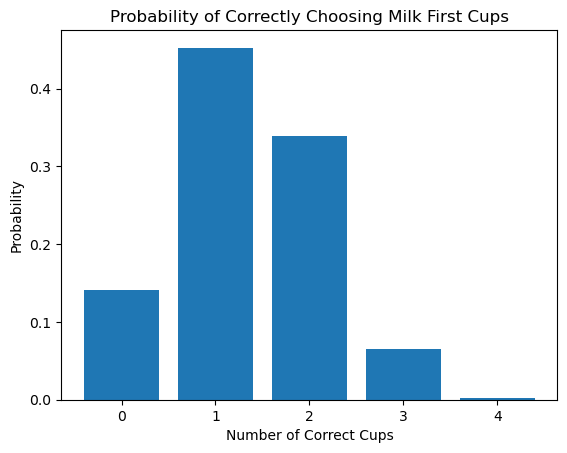

In [744]:
def plot_prob(cups, milk_first):
    total_matches = matches(cups, milk_first)[3]
    # Get the count.
    # https://numpy.org/doc/stable/reference/generated/numpy.unique.html
    count = np.array(np.unique(total_matches, return_counts=True))

    index = 0
    for cup in count[0]:
        fraction = f"{(count[1][index])}/{(sum(count[1]))}"
        probability = (count[1][index])/(sum(count[1]))
        print(f"Probability of choosing {cup} cups correctly: {fraction} ({probability:.4f})")
        index += 1

    # Plot the probabilities.
    fig, ax = plt.subplots()

    x = count[0]
    y = count[1]/sum(count[1])

    ax.bar(x, y)

    ax.set_title("Probability of Correctly Choosing Milk First Cups")
    ax.set_xlabel("Number of Correct Cups")
    ax.set_ylabel("Probability")

    plt.show()

plot = plot_prob(cups, milk_first)

### Comparing to the Original 8 Cup Experiment

Probability of choosing 0 cups correctly: 1/70 (0.0143)
Probability of choosing 1 cups correctly: 16/70 (0.2286)
Probability of choosing 2 cups correctly: 36/70 (0.5143)
Probability of choosing 3 cups correctly: 16/70 (0.2286)
Probability of choosing 4 cups correctly: 1/70 (0.0143)


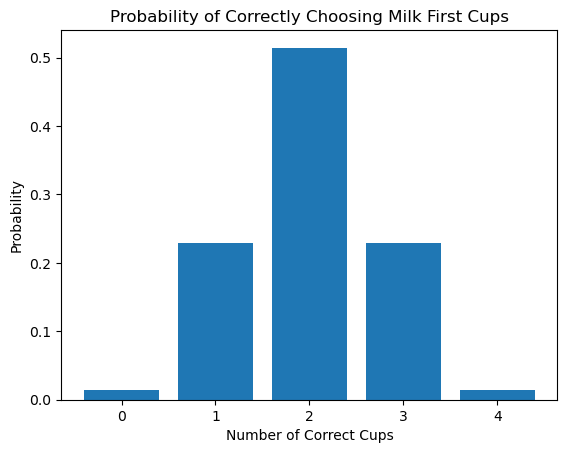

In [745]:
orig_cups = 8

plot = plot_prob(orig_cups, milk_first)

### Extended 12 cup experiment

In [748]:
total_cups = 8
tea_first = 8
milk_first = 4

# https://docs.python.org/3/library/math.html#math.comb
combinations = math.comb(total_cups, milk_first)
combinations

70

[0 1 2 3 4 5 6 7]
[4 7 1 3]
[[   0    1    2    3    4]
 [ 145 2264 5210 2235  146]]
[0.0145 0.2264 0.521  0.2235 0.0146]


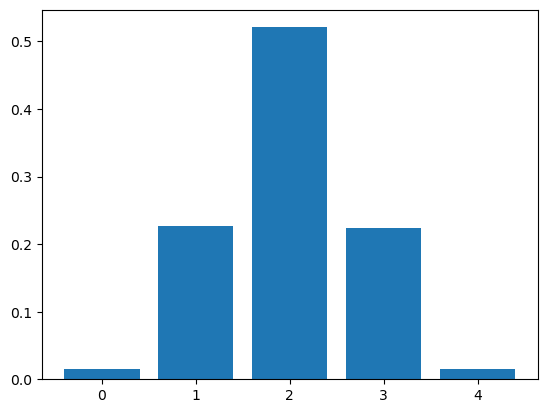

In [749]:
cup_labels = np.arange(total_cups)
milk_first_labels = np.random.choice(cup_labels, milk_first, replace=False)
print(cup_labels)
print(milk_first_labels)

number_of_people = 10000

guesses = np.array([np.random.choice(cup_labels, milk_first, replace=False) for i in range(number_of_people)])


total_matches = []
for guess in guesses:
    match = set(guess).intersection(set(milk_first_labels))
    total_matches.append(len(match))

counts12 = np.array(np.unique(total_matches, return_counts=True))
print(counts12)
print(counts12[1]/sum(counts12[1]))

fig, ax = plt.subplots()

ax.bar(counts12[0], counts12[1]/number_of_people)

plt.show()

## Problem 2: Normal Distribution

## Problem 3: t-Tests

## Problem 4: ANOVA

## End